# IP3 demo

In [1]:
from neuron import h, crxd as rxd

h.load_file("stdrun.hoc")

1.0

In [2]:
dend = h.Section(name="dend")
dend.L = 100
dend.nseg = 101

In [3]:
def my_initial(node):
    if 0.4 < node.segment.x < 0.6:
        return 1
    else:
        return 0


cyt = rxd.Region(h.allsec(), name="cyt", nrn_region="i")
ip3 = rxd.Species(cyt, name="ip3", d=1, initial=my_initial)

In [4]:
from matplotlib import pyplot


def plot_it():
    xs = [seg.x * dend.L for seg in dend]
    ys = [seg.ip3i for seg in dend]
    pyplot.plot(xs, ys)

Text(0, 0.5, '[IP3]')

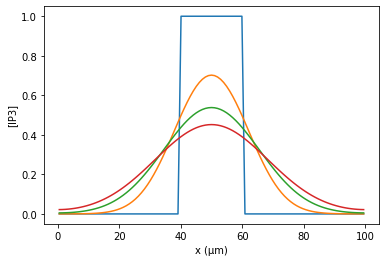

In [5]:
%matplotlib inline
h.finitialize(-65)
for tstop in [0, 50, 100, 150]:
    h.continuerun(tstop)
    plot_it()
pyplot.xlabel("x (µm)")
pyplot.ylabel("[IP3]")

In [6]:
nM = 1e-6  # relative to NEURON's default mM

h.finitialize(-65)
while dend(0.7).ip3i < 100 * nM:
    h.fadvance()

print("crossed 100 nM at t = {} ms".format(h.t))

crossed 100 nM at t = 2.8250000000000064 ms


In [7]:
ip3_vec = h.Vector()
ip3_vec.record(dend(0.7)._ref_ip3i)
t_vec = h.Vector()
t_vec.record(h._ref_t)

h.finitialize(-65)
h.continuerun(1000)
max_ip3 = max(ip3_vec)
print("peak ip3 =", max_ip3)
print("final ip3 =", dend(0.7).ip3i)

peak ip3 = 0.25437182627374194
final ip3 = 0.2103198308254167
